In [1]:
from bs4 import BeautifulSoup
import requests
import numpy as nm
import matplotlib.pyplot as plt
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'}
flipkart = ''
amazon = ''

In [39]:
def flipkart(name):
    try:
        global flipkart_rating
        global flipkart1
        name1 = name.replace(" ", "+")
        flipkart1 = f'https://www.flipkart.com/search?q={name1}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off'
        res = requests.get(f'https://www.flipkart.com/search?q={name1}&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off', headers=headers)
        print("\nSearching in flipkart....")
        soup = BeautifulSoup(res.text, 'html.parser')
        if (soup.select('._4rR01T')):
            flipkart_name = soup.select('._4rR01T')[0].getText().strip().upper()
            if name.upper() in flipkart_name:
                flipkart_price = soup.select('._30jeq3')[0].getText().strip()
               # flipkart_rating = soup.select('._3LWZlK')[0].getText().strip()
                flipkart_rating = soup.find('div',class_="_3LWZlK")
                flipkart_name = soup.select('._4rR01T')[0].getText().strip()
                print("Flipkart:")
                print(flipkart_name)
                print(f"rating: {flipkart_rating.text}")
                print(flipkart_price)
                print("---------------------------------")

        elif (soup.select('.s1Q9rs')):
            flipkart_name = soup.select('.s1Q9rs')[0].getText().strip()
            flipkart_name = flipkart_name.upper()
            if name.upper() in flipkart_name:
                flipkart_price = soup.select('._30jeq3')[0].getText().strip()
                #flipkart_rating = soup.find('div',class_="_3LWZlK")
                flipkart_rating = soup.select('._3LWZlK')[0].getText().strip()
                flipkart_name = soup.select('.s1Q9rs')[0].getText().strip()
                print("Flipkart:")
                print(flipkart_name)
                print(f"rating: {flipkart_rating.text}")
                print(flipkart_price)
                print("---------------------------------")
        else:
            flipkart_price = '0'

        return flipkart_price
    except:
        print("Flipkart: No product found!")
        print("---------------------------------")
        flipkart_price = '0'
    return flipkart_price

In [40]:
def amazon(name):
    try:
        global amazon_rating
        global amazon1
        name1 = name.replace(" ", "-")
        name2 = name.replace(" ", "+")
        amazon1 = f'https://www.amazon.in/{name1}/s?k={name2}'
        res = requests.get(f'https://www.amazon.in/{name1}/s?k={name2}', headers=headers)
        print("\nSearching in amazon...")
        soup = BeautifulSoup(res.text, 'html.parser')
        amazon_page = soup.select('.a-color-base.a-text-normal')
        amazon_page_length = int(len(amazon_page))
        for i in range(0, amazon_page_length):
            name = name.upper()
            amazon_name = soup.select('.a-color-base.a-text-normal')[i].getText().strip().upper()
            if name in amazon_name:
                amazon_name = soup.select('.a-color-base.a-text-normal')[i].getText().strip()
                amazon_rating = soup.select('.a-icon-alt')[i].getText().strip().upper()[0:3]
                amazon_price = soup.select('.a-price-whole')[i].getText().strip().upper()
                print("Amazon:")
                print(amazon_name)
                print(f"rating: {amazon_rating}")
                print("₹"+amazon_price)
                print("---------------------------------")
                break
            else:
                i += 1
                i = int(i)
                if i == amazon_page_length:
                    amazon_price = '0'
                    print("amazon : No product found!")
                    print("-----------------------------")
                    break

        return amazon_price
        return amazon_rating
    except:
        print("Amazon: No product found!")
        print("---------------------------------")
        amazon_price = '0'
    return amazon_price
    return amazon_rating

In [41]:
def convert(a):
    b = a.replace(" ", '')
    c = b.replace("INR", '')
    d = c.replace(",", '')
    f = d.replace("₹", '')
    g = int(float(f))
    return g


name = input("Product Name:\n")
flipkart_price = flipkart(name)
amazon_price = amazon(name)
if flipkart_price == '0':
    print("Flipkart: No product found!")
    flipkart_price = int(flipkart_price)
else:
    print("\nFlipkart Price:", flipkart_price)
    flipkart_price = convert(flipkart_price)
if amazon_price == '0':
    print("Amazon: No product found!")
    amazon_price = int(amazon_price)
else:
    print("\nAmazon price: ₹"+amazon_price)
    amazon_price = convert(amazon_price)

Product Name:
iphone 12

Searching in flipkart....
Flipkart:
APPLE iPhone 12 (Purple, 128 GB)
rating: 4.6
₹55,999
---------------------------------

Searching in amazon...
Amazon:
Apple iPhone 12 (128GB) - (Product) RED
rating: 4.5
₹64,999.
---------------------------------

Flipkart Price: ₹55,999

Amazon price: ₹64,999.


Flipkart gave the best deal to choose....


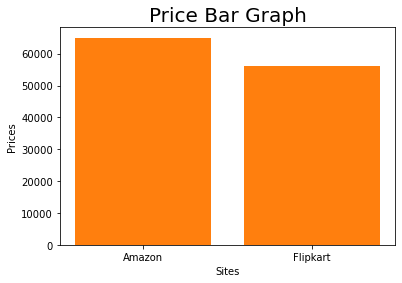

64,999.


In [25]:
x1=amazon_price
y1=flipkart_price
x2=X3
X=['Amazon','Flipkart']
Y=[x1,y1]
plt.xlabel('Sites')
plt.ylabel('Prices')
plt.title('Price Bar Graph',fontdict={'fontsize':20})
plt.bar(X,Y)

if(x1!=0 and y1!=0 and x1!= y1):
  if(x1>y1):
    D='Flipkart'
  else:
    D='Amazon'  
  print(D,'gave the best deal to choose....')
if(x1==y1 and x1!=0 and y1!=0):
    print('Both gave the same offer choose any of them....')
plt.bar(X,Y)
plt.show()
print(x2)

In [6]:
if(x1>y1):
    d1=y1
else:
    d1=x1
p1 = d1+(d1*10/100)
p2 = d1-(d1*10/100)
p3 = p2+(p2*3/100)
p4 = p3+(p3*3/100)
p5 = p4+(p4*3/100)
p6 = p5-(x1*4/100)
p7 = p6+(p2*4/100)
p8 = p7+(p7*4/100)

In [7]:
e=[1,2,3,4,5,6,7,8,9]
if(name=='iphone 12'):
    d= pd.read_csv('/Users/princegarg/Downloads/iphone12.csv')
else:
    d=[p1,p2,p3,p4,p5,p6,p7,p8,d1]
if(name=='iphone 13'):
    d= pd.read_csv('/Users/princegarg/Downloads/iphone13.csv')
else:
    d=[p1,p2,p3,p4,p5,p6,p7,p8,d1]
if(name=='macbook air'):
    d= pd.read_csv('/Users/princegarg/Downloads/macbook.csv')
else:
    d=[p1,p2,p3,p4,p5,p6,p7,p8,d1]

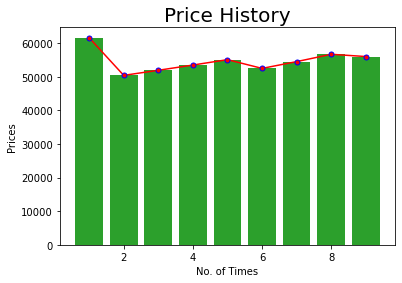

In [45]:
plt.plot(e,d,color='red',marker='.',markersize=10,markeredgecolor='blue')
plt.xlabel("No. of Times")
plt.ylabel("Prices")
plt.title("Price History",fontdict={'fontsize':20})
plt.bar(e,d)
plt.bar(e,d)
plt.bar(e,d)
plt.show()

In [9]:
lst = [flipkart_price,amazon_price]
lst2=[]
for j in range(0,len(lst)):
    if lst[j]>0:
        lst2.append(lst[j])
if len(lst2)==0:
    print("No relative product find in all websites....")
else:
    min_price=min(lst2)

    print("_______________________________")
    print("\nMinimun Price: ₹",min_price)
    price = {
        f'{amazon_price}':f'{amazon1}',
        f'{flipkart_price}':f'{flipkart1}',
    }
    for key, value in price.items():
        if int(key)==min_price and x1!=y1:
            print ('\nURL:', price[key],'\n')
    if(amazon_price!=0 and flipkart_price!=0):
      print("----------------------------------------------------URLs---------------------------------------------------------\n")
      print("Flipkart : \n",flipkart1)
      print("\nAmazon : \n",amazon1)
      print("\n-----------------------------------------------------------------------------------------------------------------")

_______________________________

Minimun Price: ₹ 55999

URL: https://www.flipkart.com/search?q=iphone+12&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off 

----------------------------------------------------URLs---------------------------------------------------------

Flipkart : 
 https://www.flipkart.com/search?q=iphone+12&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off

Amazon : 
 https://www.amazon.in/iphone-12/s?k=iphone+12

-----------------------------------------------------------------------------------------------------------------
